# `CREDIT CARD FRAUD DETECTION`
###  [Datasets](https://www.kaggle.com/datasets/kartik2112/fraud-detection)

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import datetime as dt
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
train_df = pd.read_csv("data/card data/fraudTrain.csv")
test_df = pd.read_csv("data/card data/fraudTest.csv")

In [4]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
train_df.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [8]:
train_df.duplicated().sum()

0

In [9]:
test_df.duplicated().sum()

0

In [10]:
del train_df["Unnamed: 0"]	
del test_df["Unnamed: 0"]	

In [11]:
train_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [12]:
train_df.sample()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
696395,2019-10-24 13:44:23,30131826429364,fraud_Beier-Hyatt,shopping_pos,41.79,Brianna,Foley,F,57256 Raymond Ports,Knoxville,...,35.9335,-84.1481,391389,"Designer, industrial/product",1994-04-22,24b4b6ccb9522bc67a2ef555b7e2c9a3,1351086263,36.92497,-83.166764,0


In [13]:
train_df.sample()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
206140,2019-04-15 11:22:44,501828204849,fraud_Jacobi and Sons,shopping_pos,1.43,Sandra,Davies,F,31954 Eugene Lane Suite 572,Dexter,...,37.1641,-96.6917,602,"Buyer, industrial",1958-10-26,ae4f50347250582a881c3fd96b7b59ec,1334488964,36.868716,-96.889904,0


In [14]:
train_df["name"] = train_df['first'] + ' ' + train_df['last']
test_df["name"] = test_df['first'] + ' ' + test_df['last']

In [15]:
train_df.drop(columns=["first","last","street","city","state","unix_time"],inplace=True)
test_df.drop(columns=["first","last","street","city","state","unix_time"],inplace=True)

In [16]:
train_df.sample(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,name
400360,2019-07-01 02:54:28,5359543825610251,fraud_Marks Inc,gas_transport,87.01,M,59714,45.7801,-111.1439,18182,"Engineer, drilling",1975-06-29,cdca20b28ff5c350bb9c6a9226941295,45.796185,-110.886426,0,Michael Francis
1028230,2020-03-02 06:26:58,3517814635263522,fraud_Padberg-Welch,grocery_pos,136.53,M,24983,37.5802,-80.5248,2443,Chartered public finance accountant,1941-10-16,4e893d1e9477201ceed635c4bd1d8f42,37.799671,-80.123527,0,William Cannon


In [17]:
train_df.corr(numeric_only=True)

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
cc_num,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,-0.058942,-0.048252,-0.000981
amt,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.001873,-0.000151,0.219404
zip,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,-0.113561,-0.908924,-0.002162
lat,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.993592,-0.015509,0.001894
long,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.015452,0.999120,0.001721
city_pop,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.154781,-0.052687,0.002136
merch_lat,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,1.000000,-0.015431,0.001741
merch_long,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.015431,1.000000,0.001721
is_fraud,-0.000981,0.219404,-0.002162,0.001894,0.001721,0.002136,0.001741,0.001721,1.000000


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   gender                 1296675 non-null  object 
 6   zip                    1296675 non-null  int64  
 7   lat                    1296675 non-null  float64
 8   long                   1296675 non-null  float64
 9   city_pop               1296675 non-null  int64  
 10  job                    1296675 non-null  object 
 11  dob                    1296675 non-null  object 
 12  trans_num              1296675 non-null  object 
 13  merch_lat              1296675 non-null  float64
 14  merch_long        

In [19]:
lb = LabelEncoder()

In [20]:
train_df["merchant_lb"] =  lb.fit_transform(train_df.merchant)
train_df["category_lb"] =  lb.fit_transform(train_df.category)
train_df["job_lb"] =  lb.fit_transform(train_df.job)



test_df["merchant_lb"] =  lb.fit_transform(test_df.merchant)
test_df["category_lb"] =  lb.fit_transform(test_df.category)
test_df["job_lb"] =  lb.fit_transform(test_df.job)

In [21]:
train_df.sample()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,name,merchant_lb,category_lb,job_lb
667489,2019-10-11 23:49:39,372509258176510,"fraud_Schiller, Blanda and Johnson",home,18.22,F,48438,42.9147,-83.4845,6951,Learning disability nurse,1985-06-18,979e258ac03d7695655fa948b894cf97,43.601607,-84.184192,0,Kristen Hanson,552,6,263


In [22]:
train_df.corr(numeric_only=True)

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,merchant_lb,category_lb,job_lb
cc_num,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,-0.058942,-0.048252,-0.000981,0.000055,0.001230,0.029165
amt,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.001873,-0.000151,0.219404,-0.002633,0.030867,-0.000628
zip,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,-0.113561,-0.908924,-0.002162,0.001113,0.002371,-0.005678
lat,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.993592,-0.015509,0.001894,-0.002266,-0.008660,-0.027593
long,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.015452,0.999120,0.001721,-0.000697,-0.000767,-0.002729
city_pop,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.154781,-0.052687,0.002136,0.001911,0.009386,-0.054945
merch_lat,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,1.000000,-0.015431,0.001741,-0.002263,-0.008519,-0.027412
merch_long,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.015431,1.000000,0.001721,-0.000673,-0.000736,-0.002727
is_fraud,-0.000981,0.219404,-0.002162,0.001894,0.001721,0.002136,0.001741,0.001721,1.000000,-0.000536,0.020205,-0.000093
merchant_lb,0.000055,-0.002633,0.001113,-0.002266,-0.000697,0.001911,-0.002263,-0.000673,-0.000536,1.000000,0.032302,0.001360


In [23]:
train_df.trans_date_trans_time  = pd.to_datetime(train_df.trans_date_trans_time)
test_df.trans_date_trans_time  = pd.to_datetime(test_df.trans_date_trans_time)

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   zip                    1296675 non-null  int64         
 7   lat                    1296675 non-null  float64       
 8   long                   1296675 non-null  float64       
 9   city_pop               1296675 non-null  int64         
 10  job                    1296675 non-null  object        
 11  dob                    1296675 non-null  object        
 12  trans_num              12966

In [25]:
train_df["year"] = train_df.trans_date_trans_time.dt.year
train_df["month"] = train_df.trans_date_trans_time.dt.month
train_df["date"] = train_df.trans_date_trans_time.dt.day

In [26]:
test_df["year"] = test_df.trans_date_trans_time.dt.year
test_df["month"] = test_df.trans_date_trans_time.dt.month
test_df["date"] = test_df.trans_date_trans_time.dt.day

#  Exploratory Data Analysis (EDA) 

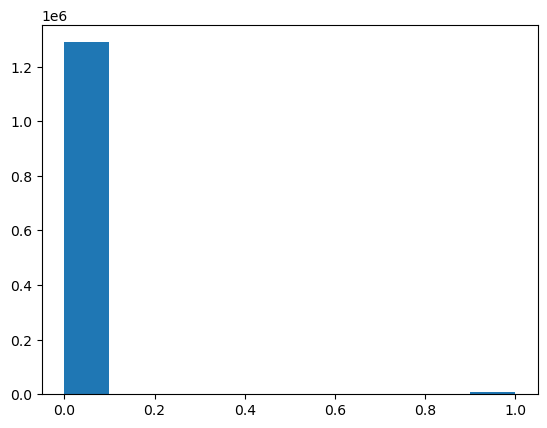

In [28]:
plt.hist(train_df.is_fraud);

In [29]:
x = train_df.drop(columns=["is_fraud"])

In [30]:
y = train_df.is_fraud

In [31]:
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x, y)
print("Undersampled class distribution:", Counter(y_under))

Undersampled class distribution: Counter({0: 7506, 1: 7506})


In [32]:
type(x_under),type(y_under)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [33]:
new_df = pd.concat([x_under,pd.DataFrame(y_under)],axis=1)

In [34]:
new_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,...,merch_lat,merch_long,name,merchant_lb,category_lb,job_lb,year,month,date,is_fraud
271249,2019-05-13 23:10:02,4223708906367574214,fraud_Kihn Inc,shopping_pos,140.41,M,45051,39.0965,-84.6431,177,...,38.329780,-85.068637,Adam Riddle,310,12,187,2019,5,13,0
1144586,2020-04-21 17:26:12,4710826438164847414,"fraud_Dare, Casper and Bartoletti",kids_pets,16.47,M,59542,48.8328,-108.3961,192,...,47.871024,-107.559804,Juan Henry,122,7,205,2020,4,21,0
699786,2019-10-26 05:58:09,2712209726293386,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,196.61,F,70808,30.4066,-91.1468,378909,...,29.627773,-90.995022,Jenna Brooks,563,4,123,2019,10,26,0
1119216,2020-04-11 05:51:42,3562264947797243,fraud_O'Keefe-Hudson,grocery_pos,110.96,M,40062,37.6047,-85.4251,301,...,37.977501,-85.226974,Anthony Velasquez,459,4,390,2020,4,11,0
457586,2019-07-21 16:56:14,6011693194885790,fraud_Howe PLC,entertainment,46.89,F,55080,45.6675,-93.2433,2607,...,44.748612,-93.727885,Victoria Fleming,266,0,265,2019,7,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,F,32960,27.6330,-80.4031,105638,...,26.888686,-80.834389,Ashley Cabrera,295,11,271,2020,6,21,1
1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,F,32960,27.6330,-80.4031,105638,...,28.216707,-79.855648,Ashley Cabrera,571,11,271,2020,6,21,1
1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,M,70726,30.4590,-90.9027,71335,...,29.700456,-91.361632,William Perry,622,2,222,2020,6,21,1
1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,F,79759,31.8599,-102.7413,23,...,32.675272,-103.484949,Brooke Smith,107,2,115,2020,6,21,1


In [35]:
new_df.reset_index(inplace=True)

In [36]:
new_df.drop(columns=["trans_date_trans_time","index"],inplace=True)

In [37]:
new_df

,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,...,merch_lat,merch_long,name,merchant_lb,category_lb,job_lb,year,month,date,is_fraud
0,4223708906367574214,fraud_Kihn Inc,shopping_pos,140.41,M,45051,39.0965,-84.6431,177,Exhibition designer,...,38.329780,-85.068637,Adam Riddle,310,12,187,2019,5,13,0
1,4710826438164847414,"fraud_Dare, Casper and Bartoletti",kids_pets,16.47,M,59542,48.8328,-108.3961,192,Further education lecturer,...,47.871024,-107.559804,Juan Henry,122,7,205,2020,4,21,0
2,2712209726293386,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,196.61,F,70808,30.4066,-91.1468,378909,"Designer, furniture",...,29.627773,-90.995022,Jenna Brooks,563,4,123,2019,10,26,0
3,3562264947797243,fraud_O'Keefe-Hudson,grocery_pos,110.96,M,40062,37.6047,-85.4251,301,"Research officer, political party",...,37.977501,-85.226974,Anthony Velasquez,459,4,390,2020,4,11,0
4,6011693194885790,fraud_Howe PLC,entertainment,46.89,F,55080,45.6675,-93.2433,2607,"Lecturer, further education",...,44.748612,-93.727885,Victoria Fleming,266,0,265,2019,7,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,F,32960,27.6330,-80.4031,105638,"Librarian, public",...,26.888686,-80.834389,Ashley Cabrera,295,11,271,2020,6,21,1
15008,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,F,32960,27.6330,-80.4031,105638,"Librarian, public",...,28.216707,-79.855648,Ashley Cabrera,571,11,271,2020,6,21,1
15009,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,M,70726,30.4590,-90.9027,71335,Herbalist,...,29.700456,-91.361632,William Perry,622,2,222,2020,6,21,1
15010,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,F,79759,31.8599,-102.7413,23,Cytogeneticist,...,32.675272,-103.484949,Brooke Smith,107,2,115,2020,6,21,1


In [38]:
new_df.is_fraud.value_counts()

0    7506
1    7506
Name: is_fraud, dtype: int64

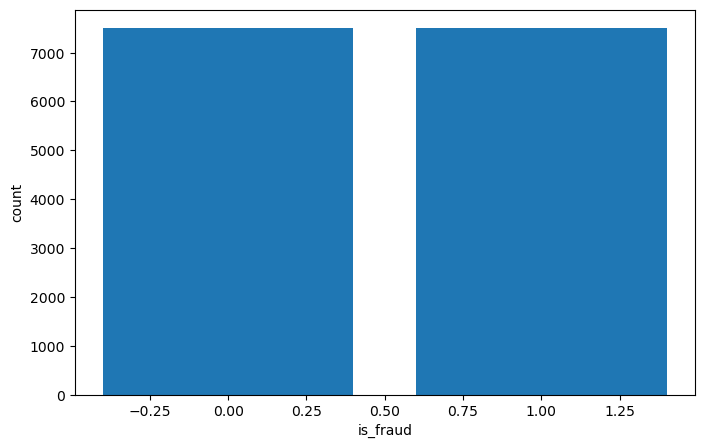

In [39]:
count = new_df.is_fraud.value_counts()

fig,ax =plt.subplots(figsize=(8,5))
ax.bar(count.index,count.values)

ax.set_xlabel("is_fraud")
ax.set_ylabel("count")
plt.show()

In [40]:
merchant_df = train_df.groupby('merchant').size().reset_index(name='counts')
merchant_df =merchant_df[merchant_df.counts >3000]

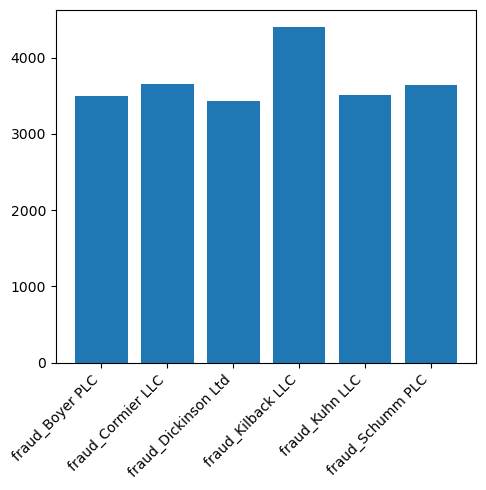

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.bar(merchant_df['merchant'], merchant_df['counts'])

plt.xticks(rotation=45, ha='right')

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(merchant_df['merchant'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
new_df.corr(numeric_only=True)

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,merchant_lb,category_lb,job_lb,year,month,date,is_fraud
cc_num,1.000000,0.019619,0.039035,-0.040981,-0.052550,-0.010198,-0.041582,-0.052589,0.002209,0.009978,0.032723,0.011623,-0.007714,0.017826,-0.002029
amt,0.019619,1.000000,-0.015577,0.011655,0.013644,0.018937,0.010390,0.013869,-0.006333,0.444795,-0.016858,0.013422,-0.035677,0.017339,0.628478
zip,0.039035,-0.015577,1.000000,-0.089370,-0.908270,0.097495,-0.088826,-0.907284,-0.001658,-0.002398,-0.003537,-0.002799,0.000855,0.016692,-0.006574
lat,-0.040981,0.011655,-0.089370,1.000000,-0.054829,-0.161408,0.993731,-0.055033,0.006423,-0.013266,-0.040207,-0.001474,-0.014029,-0.032901,0.017210
long,-0.052550,0.013644,-0.908270,-0.054829,1.000000,-0.064747,-0.054976,0.999132,0.000786,0.003030,0.004684,-0.006003,0.014861,-0.010057,0.002324
city_pop,-0.010198,0.018937,0.097495,-0.161408,-0.064747,1.000000,-0.161806,-0.064913,-0.006309,-0.000171,-0.066120,0.013852,-0.012211,-0.007595,0.007318
merch_lat,-0.041582,0.010390,-0.088826,0.993731,-0.054976,-0.161806,1.000000,-0.055075,0.006795,-0.012256,-0.038541,-0.001705,-0.013305,-0.033156,0.015547
merch_long,-0.052589,0.013869,-0.907284,-0.055033,0.999132,-0.064913,-0.055075,1.000000,0.001021,0.004048,0.004788,-0.006304,0.015403,-0.010280,0.002217
merchant_lb,0.002209,-0.006333,-0.001658,0.006423,0.000786,-0.006309,0.006795,0.001021,1.000000,0.026169,0.003216,0.003331,0.016120,-0.005338,-0.006484
category_lb,0.009978,0.444795,-0.002398,-0.013266,0.003030,-0.000171,-0.012256,0.004048,0.026169,1.000000,-0.002729,-0.005843,-0.005147,0.009973,0.135430


<Axes: >

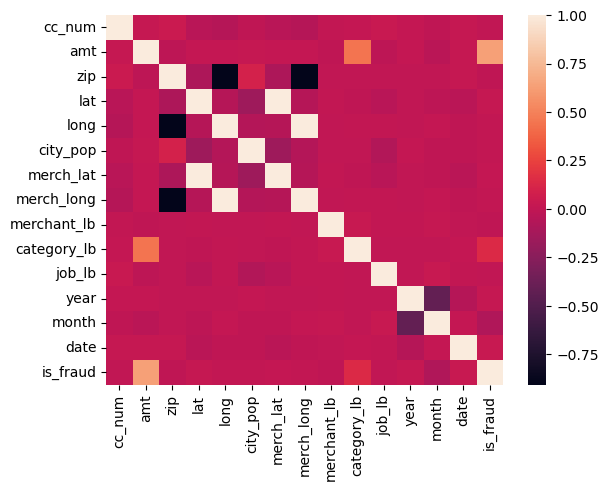

In [43]:
sns.heatmap(new_df.corr(numeric_only=True))

<Axes: xlabel='is_fraud', ylabel='amt'>

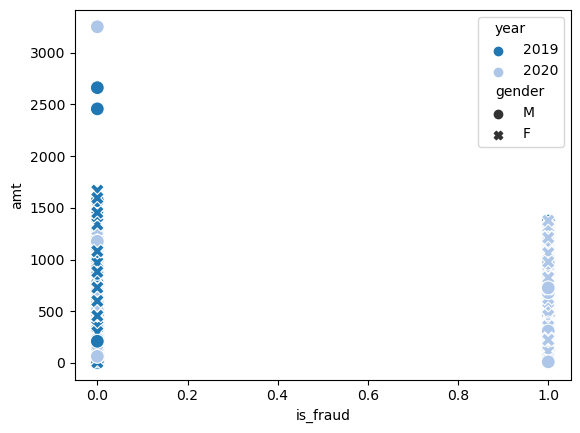

In [44]:
sns.scatterplot(data=new_df,x='is_fraud',y='amt',hue='year',style='gender',palette='tab20', markers=True,  s=100  )

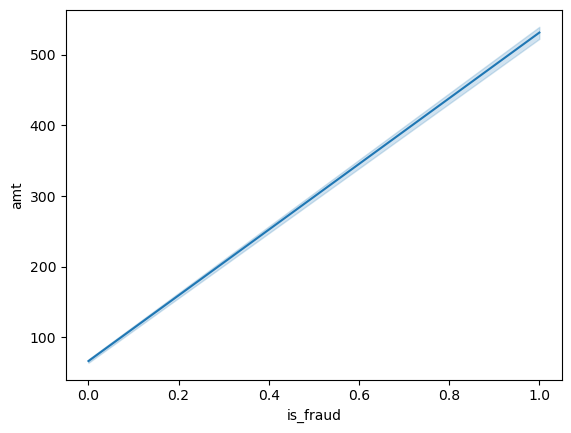

In [45]:
sns.lineplot(data=new_df,y=new_df.amt,x=new_df.is_fraud);

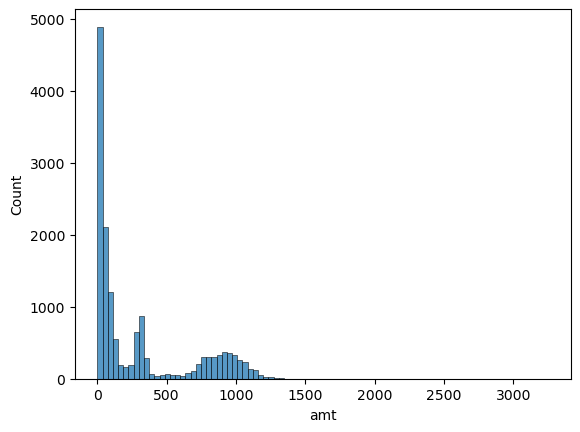

In [46]:
sns.histplot(data=new_df,x=new_df.amt);

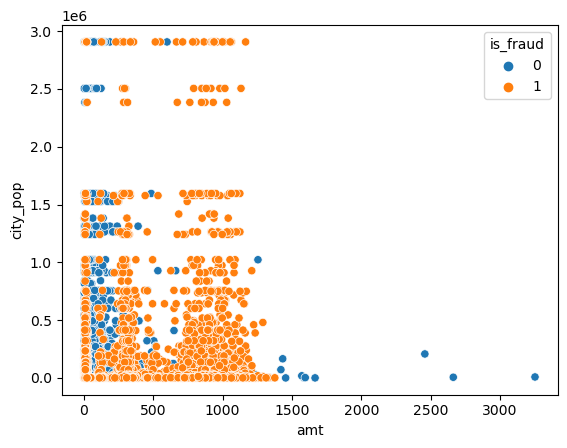

In [47]:
sns.scatterplot(data=new_df,x=new_df.amt,y=new_df.city_pop,hue=new_df.is_fraud);

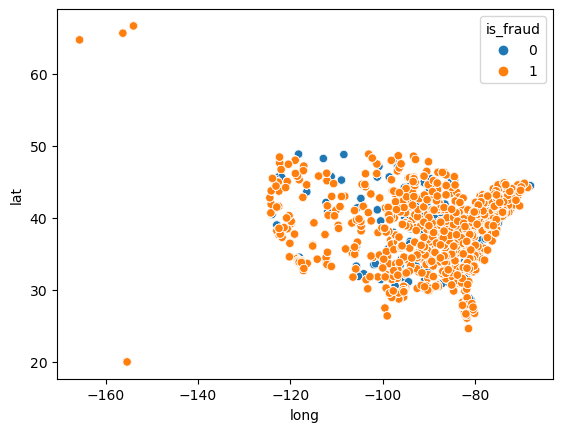

In [48]:
sns.scatterplot(data=new_df,x=new_df.long,y=new_df.lat,hue=new_df.is_fraud);

In [49]:
new_df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob', 'trans_num', 'merch_lat', 'merch_long',
       'name', 'merchant_lb', 'category_lb', 'job_lb', 'year', 'month', 'date',
       'is_fraud'],
      dtype='object')

In [50]:
x = new_df[["cc_num","merchant_lb","category_lb","job_lb","year","lat","long","city_pop","amt","merch_lat","merch_long"]]
x

,cc_num,merchant_lb,category_lb,job_lb,year,lat,long,city_pop,amt,merch_lat,merch_long
0,4223708906367574214,310,12,187,2019,39.0965,-84.6431,177,140.41,38.329780,-85.068637
1,4710826438164847414,122,7,205,2020,48.8328,-108.3961,192,16.47,47.871024,-107.559804
2,2712209726293386,563,4,123,2019,30.4066,-91.1468,378909,196.61,29.627773,-90.995022
3,3562264947797243,459,4,390,2020,37.6047,-85.4251,301,110.96,37.977501,-85.226974
4,6011693194885790,266,0,265,2019,45.6675,-93.2433,2607,46.89,44.748612,-93.727885
...,...,...,...,...,...,...,...,...,...,...,...
15007,3524574586339330,295,11,271,2020,27.6330,-80.4031,105638,977.01,26.888686,-80.834389
15008,3524574586339330,571,11,271,2020,27.6330,-80.4031,105638,1210.91,28.216707,-79.855648
15009,4005676619255478,622,2,222,2020,30.4590,-90.9027,71335,10.24,29.700456,-91.361632
15010,3560725013359375,107,2,115,2020,31.8599,-102.7413,23,21.69,32.675272,-103.484949


In [51]:
y = new_df["is_fraud"]
y

0        0
1        0
2        0
3        0
4        0
        ..
15007    1
15008    1
15009    1
15010    1
15011    1
Name: is_fraud, Length: 15012, dtype: int64

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.2,random_state=42)

In [53]:
x_train.shape,y_train.shape

((12009, 11), (12009,))

# Random Forest Classifier & DecisionTree Classifier

In [55]:
rf = RandomForestClassifier()
tree = DecisionTreeClassifier()

In [56]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
y_pred_tree = tree.predict(x_test)
y_pred_tree

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [59]:
y_pred_rf =  rf.predict(x_test)
y_pred_rf

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score,precision_score

In [61]:
accuracy_score(y_test,y_pred_tree)

0.945054945054945

In [62]:
accuracy_score(y_test,y_pred_rf)

0.9527139527139528

In [63]:
precision_score(y_test,y_pred_tree)

0.9463447350771295

In [64]:
precision_score(y_test,y_pred_rf)

0.9611716621253406

In [149]:
test = test_df[["cc_num","merchant_lb","category_lb","job_lb","year","lat","long","city_pop","amt","merch_lat","merch_long","is_fraud"]]

In [163]:
test.sample(7)

,cc_num,merchant_lb,category_lb,job_lb,year,lat,long,city_pop,amt,merch_lat,merch_long,is_fraud
97852,630441765090,388,1,105,2020,31.9571,-98.9656,1791,81.31,31.074375,-98.429671,0
176760,213120463918358,164,6,359,2020,32.9550,-92.5870,1758,106.47,32.373895,-92.270586,0
37659,4560004149983868183,238,11,291,2020,38.8881,-104.6556,525713,14.12,39.245669,-103.836548,0
2195,4005676619255478,194,4,214,2020,30.4590,-90.9027,71335,326.94,29.784597,-90.671894,1
153041,4826655832045236,540,5,106,2020,41.6983,-70.3001,1850,49.99,42.265219,-71.181959,0
222373,4103158249977,94,4,321,2020,33.6666,-101.5277,1571,100.88,34.280563,-101.029494,0
304729,3567697931646329,229,2,466,2020,42.2470,-73.7552,17867,86.56,43.189404,-74.492239,0


In [206]:
prediction = rf.predict([[3567697931646329,229,2,466,2020,42.2470,-73.7552,17867,86.56,43.189404,-74.492239]])[0]

In [208]:
def check_is_fraud(prediction):
    if prediction == 0:
        print("Non-Fraud")
    else:
        print("Fraud")

In [210]:
check_is_fraud(prediction)

Non-Fraud
